In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 4000
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA

import sys
sys.path.append('../.')
from lib import get_data

In [2]:
df = get_data.get_model_data(date_range=(0,14), pred_day=21)
df.head()

,state,county,fips,cases,deaths,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,...,retail_and_recreation_percent_change_from_baseline,residential_percent_change_from_baseline,workplaces_percent_change_from_baseline,transit_stations_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,income_2018,pop_2018,day_21_delta_cases,day_21_delta_deaths
0,alabama,baldwin,1003,34.266667,0.733333,0.000000,30.800000,89.066667,50.306667,56.046667,...,-43.533333,13.066667,-34.333333,-28.666667,-14.400000,-36.133333,45596.0,218022.0,43,1
1,alabama,chambers,1017,57.466667,3.800000,0.000000,29.044444,87.155556,47.024444,52.260000,...,-28.800000,12.800000,-38.400000,-28.500000,2.153846,NaN,33859.0,33615.0,87,2
2,alabama,elmore,1051,17.133333,0.000000,0.333333,33.933333,90.133333,47.853333,53.253333,...,-31.000000,15.166667,-37.533333,NaN,0.133333,27.571429,42269.0,81887.0,25,0
3,alabama,jefferson,1073,94.000000,0.000000,3.866667,48.155556,92.511111,53.826667,59.091111,...,-34.933333,13.066667,-32.533333,-28.133333,2.533333,13.133333,54730.0,659300.0,172,9
4,alabama,lauderdale,1077,15.000000,1.733333,0.066667,36.733333,90.866667,44.940000,49.646667,...,-36.733333,13.142857,-35.866667,NaN,-5.400000,NaN,37151.0,92387.0,3,1


In [3]:
df.shape

(735, 70)

In [4]:
# select only numeric data, drop fips column, drop rows with NA
dfnum = df._get_numeric_data().drop(['fips'],axis=1).dropna()
dfnum.head()

,cases,deaths,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,dewPtMax,feelsLikeMin,feelsLikeAvg,...,retail_and_recreation_percent_change_from_baseline,residential_percent_change_from_baseline,workplaces_percent_change_from_baseline,transit_stations_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,income_2018,pop_2018,day_21_delta_cases,day_21_delta_deaths
0,34.266667,0.733333,0.000000,30.800000,89.066667,50.306667,56.046667,62.120000,57.486667,69.293333,...,-43.533333,13.066667,-34.333333,-28.666667,-14.400000,-36.133333,45596.0,218022.0,43,1
3,94.000000,0.000000,3.866667,48.155556,92.511111,53.826667,59.091111,64.835556,57.366667,67.015556,...,-34.933333,13.066667,-32.533333,-28.133333,2.533333,13.133333,54730.0,659300.0,172,9
7,76.266667,0.733333,5.133333,45.933333,91.266667,45.253333,49.906667,54.793333,48.760000,59.813333,...,-40.800000,16.933333,-43.666667,-40.066667,-7.666667,16.933333,51445.0,366519.0,50,2
8,86.400000,3.333333,0.800000,29.600000,86.755556,54.557778,60.308889,64.953333,60.364444,70.711111,...,-31.866667,13.533333,-33.066667,-25.933333,-3.666667,-16.733333,38243.0,413757.0,312,11
9,43.333333,0.666667,0.266667,28.133333,81.466667,50.186667,55.406667,60.786667,55.973333,68.160000,...,-36.533333,16.066667,-38.333333,-12.933333,-4.533333,-6.000000,43688.0,225763.0,108,3


In [6]:
dfnum.shape

(472, 67)

In [7]:
scaler = preprocessing.StandardScaler().fit(dfnum)
dfnum = pd.DataFrame(scaler.fit_transform(dfnum), columns=dfnum.columns)

In [8]:
dfnum.head()

,cases,deaths,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,dewPtMax,feelsLikeMin,feelsLikeAvg,...,retail_and_recreation_percent_change_from_baseline,residential_percent_change_from_baseline,workplaces_percent_change_from_baseline,transit_stations_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,income_2018,pop_2018,day_21_delta_cases,day_21_delta_deaths
0,-0.534851,-0.376093,-1.151992,-0.574647,0.596908,1.206759,1.276690,1.400859,1.350965,1.489028,...,-0.367970,-1.103464,0.911733,0.463452,-0.234235,-1.412288,-0.531696,-0.365848,-0.355936,-0.402426
1,0.125200,-0.723482,-0.615284,0.541503,0.821391,1.503695,1.543988,1.648015,1.341350,1.309166,...,0.599684,-1.103464,1.143601,0.497189,1.694469,0.171611,0.074385,0.244163,-0.159466,0.012868
2,-0.070752,-0.376093,-0.439466,0.398590,0.740287,0.780475,0.737606,0.734025,0.651700,0.740451,...,-0.060421,0.005494,-0.290544,-0.257683,0.532691,0.293779,-0.143589,-0.160570,-0.345275,-0.350515
3,0.041220,0.855559,-1.040949,-0.651820,0.446287,1.565369,1.650907,1.658734,1.581561,1.600981,...,0.944738,-0.969624,1.074899,0.636356,0.988290,-0.788587,-1.019600,-0.095269,0.053758,0.116692
4,-0.434664,-0.407674,-1.114978,-0.746142,0.101597,1.196636,1.220499,1.279506,1.229702,1.399535,...,0.419655,-0.243065,0.396471,1.458703,0.889577,-0.443516,-0.658300,-0.355147,-0.256939,-0.298603


In [9]:
full_pca = PCA(random_state=0).fit(dfnum)
full_pca.n_components_

67

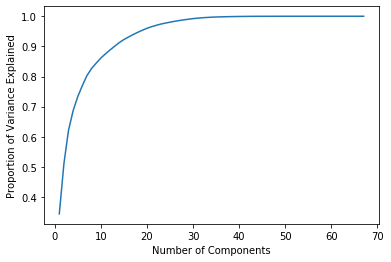

In [10]:
# Calculate the cumulative sum of the variance explained by each component.
cum_exp_var = np.cumsum(full_pca.explained_variance_ratio_)
plt.plot(np.arange(len(cum_exp_var))+1, cum_exp_var)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained');

In [11]:
cum_exp_var_df = pd.DataFrame([cum_exp_var], columns=np.arange(len(cum_exp_var))+1, index=['Variance Explained'])
cum_exp_var_df.columns.name = 'Number of PCs'
cum_exp_var_df

Number of PCs,1,2,3,4,5,6,7,8,9,10,...,58,59,60,61,62,63,64,65,66,67
Variance Explained,0.344028,0.510348,0.621672,0.686517,0.733088,0.769798,0.803252,0.826723,0.844341,0.861246,...,0.999999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [29]:
# 4?????
final_pca = PCA(4, random_state=0).fit(dfnum)
dfnum_pca = final_pca.transform(dfnum)

In [30]:
dfnum.shape

(472, 67)

In [31]:
dfnum_pca.shape

(472, 4)

In [32]:
# cross validate number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(dfnum_pca)
    wcss.append(kmeans.inertia_)

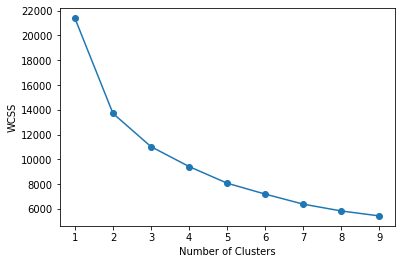

In [33]:
plt.plot(range(1,10), wcss,'-o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS');
# 4

In [34]:
kmeans_final = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(dfnum_pca)

In [35]:
dfnum_pca_kmeans = pd.concat([dfnum.reset_index(drop = True),pd.DataFrame(dfnum_pca)],axis =1)
dfnum_pca_kmeans.columns.values[-4:] = ['Principal Component 1','Principal Component 2','Principal Component 3','Principal Component 4']
dfnum_pca_kmeans['Kmeans Cluster'] = kmeans_final.labels_
dfnum_pca_kmeans.head()


,cases,deaths,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,dewPtMax,feelsLikeMin,feelsLikeAvg,...,parks_percent_change_from_baseline,income_2018,pop_2018,day_21_delta_cases,day_21_delta_deaths,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Kmeans Cluster
0,-0.534851,-0.376093,-1.151992,-0.574647,0.596908,1.206759,1.276690,1.400859,1.350965,1.489028,...,-1.412288,-0.531696,-0.365848,-0.355936,-0.402426,7.340093,1.576460,-0.195669,0.226770,1
1,0.125200,-0.723482,-0.615284,0.541503,0.821391,1.503695,1.543988,1.648015,1.341350,1.309166,...,0.171611,0.074385,0.244163,-0.159466,0.012868,6.232566,-2.535771,-1.648087,1.591942,1
2,-0.070752,-0.376093,-0.439466,0.398590,0.740287,0.780475,0.737606,0.734025,0.651700,0.740451,...,0.293779,-0.143589,-0.160570,-0.345275,-0.350515,2.882935,-2.711353,1.801982,0.070020,3
3,0.041220,0.855559,-1.040949,-0.651820,0.446287,1.565369,1.650907,1.658734,1.581561,1.600981,...,-0.788587,-1.019600,-0.095269,0.053758,0.116692,8.406545,0.919465,-1.756595,0.881838,1
4,-0.434664,-0.407674,-1.114978,-0.746142,0.101597,1.196636,1.220499,1.279506,1.229702,1.399535,...,-0.443516,-0.658300,-0.355147,-0.256939,-0.298603,7.155002,2.156506,-1.594365,0.083153,1


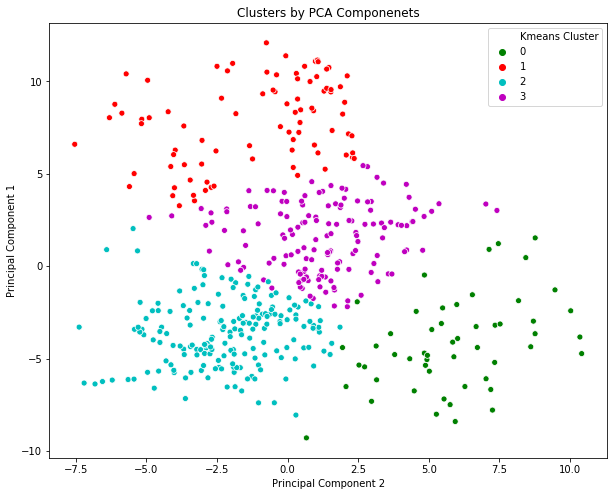

In [36]:
x_axis = dfnum_pca_kmeans['Principal Component 2']
y_axis = dfnum_pca_kmeans['Principal Component 1']
plt.figure(figsize =(10,8))
sns.scatterplot(x_axis, y_axis, hue = dfnum_pca_kmeans['Kmeans Cluster'], palette = ['g','r','c','m'])
plt.title('Clusters by PCA Componenets')
plt.show()

In [37]:
# what counties are in each cluster?


In [38]:
x = pd.DataFrame(final_pca.components_,columns=dfnum.columns,index = ['PC-1','PC-2','PC-3','PC-4'])
x

,cases,deaths,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,dewPtMax,feelsLikeMin,feelsLikeAvg,...,retail_and_recreation_percent_change_from_baseline,residential_percent_change_from_baseline,workplaces_percent_change_from_baseline,transit_stations_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,income_2018,pop_2018,day_21_delta_cases,day_21_delta_deaths
PC-1,-0.043257,-0.035210,-0.067906,-0.079806,-0.064157,0.195305,0.196165,0.195077,0.205801,0.207685,...,0.030621,-0.047294,0.033845,0.018866,0.005614,-0.101084,-0.047146,0.014724,-0.041073,-0.047411
PC-2,-0.119971,-0.061946,-0.207946,-0.231732,-0.199229,-0.092255,-0.095755,-0.100136,-0.038909,-0.004079,...,0.055615,-0.080330,0.031345,0.068306,0.033433,-0.025580,-0.077721,-0.044311,-0.103410,-0.105185
PC-3,-0.081889,-0.060177,-0.011601,0.005779,0.046342,-0.012129,0.000233,0.009850,0.004621,0.025272,...,-0.071877,0.058301,-0.068891,0.022078,-0.051304,0.024844,-0.083744,-0.114621,-0.084802,-0.081756
PC-4,0.207733,0.112848,-0.082263,-0.063162,-0.018410,-0.040740,-0.029163,-0.015550,0.002237,0.015226,...,0.339791,-0.306529,0.353534,0.148015,0.346355,0.048983,0.040147,0.201083,0.273317,0.187850


Second Try with features selected by GLM.

In [39]:
df_clean = df[['cases','deaths','grocery_and_pharmacy_percent_change_from_baseline',
             'windSpdMin','parks_percent_change_from_baseline','spcHumMin']].dropna()
df_glm = df_clean
df_glm.head()

,cases,deaths,grocery_and_pharmacy_percent_change_from_baseline,windSpdMin,parks_percent_change_from_baseline,spcHumMin
0,34.266667,0.733333,-14.400000,1.433333,-36.133333,8.220000
2,17.133333,0.000000,0.133333,0.093333,27.571429,7.566667
3,94.000000,0.000000,2.533333,0.642222,13.133333,9.151111
5,44.666667,0.600000,-7.933333,1.000000,-14.000000,8.213333
6,25.066667,0.000000,-2.333333,1.393333,14.076923,7.163333


In [40]:
scaler = preprocessing.StandardScaler().fit(df_glm)
df_glm = pd.DataFrame(scaler.fit_transform(df_glm), columns=df_glm.columns)
full_pca_glm = PCA(random_state=0).fit(df_glm)
full_pca_glm.n_components_

6

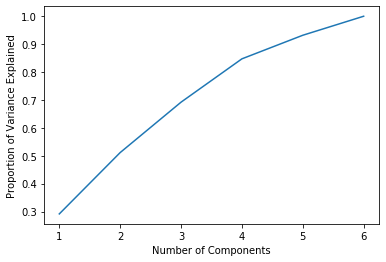

In [41]:
# Calculate the cumulative sum of the variance explained by each component.
cum_exp_var = np.cumsum(full_pca_glm.explained_variance_ratio_)
plt.plot(np.arange(len(cum_exp_var))+1, cum_exp_var)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained');

In [42]:
final_pca_glm = PCA(4, random_state=0).fit(df_glm)
glm_pca = final_pca_glm.transform(df_glm)

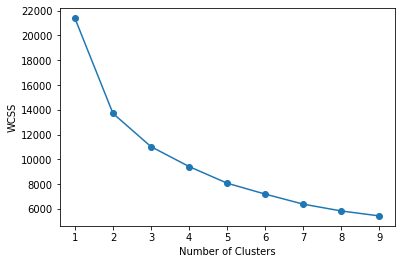

In [43]:
# cross validate number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(dfnum_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss,'-o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS');

In [44]:
kmeans_final_glm = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(glm_pca)
dfnum_pca_kmeans = pd.concat([df_glm.reset_index(drop = True),pd.DataFrame(glm_pca)],axis =1)
dfnum_pca_kmeans.columns.values[-4:] = ['Principal Component 1','Principal Component 2','Principal Component 3','Principal Component 4']
dfnum_pca_kmeans['Kmeans Cluster'] = kmeans_final_glm.labels_
dfnum_pca_kmeans.head()


,cases,deaths,grocery_and_pharmacy_percent_change_from_baseline,windSpdMin,parks_percent_change_from_baseline,spcHumMin,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Kmeans Cluster
0,-0.492365,-0.362404,-0.178318,-0.129956,-1.331519,1.155763,-1.493153,1.057296,-0.399649,0.048124,2
1,-0.691368,-0.725903,1.343095,-1.314602,0.683992,0.900831,-0.862872,-1.183323,-1.776734,0.268733,0
2,0.201432,-0.725903,1.594338,-0.829349,0.227195,1.519085,-0.614158,-0.230428,-2.091164,0.815187,0
3,-0.371570,-0.428495,0.498641,-0.513050,-0.631258,1.153162,-1.129847,0.378787,-1.035410,0.215360,2
4,-0.599223,-0.725903,1.084874,-0.165318,0.257049,0.743450,-0.758479,-0.605189,-0.979260,0.882413,0


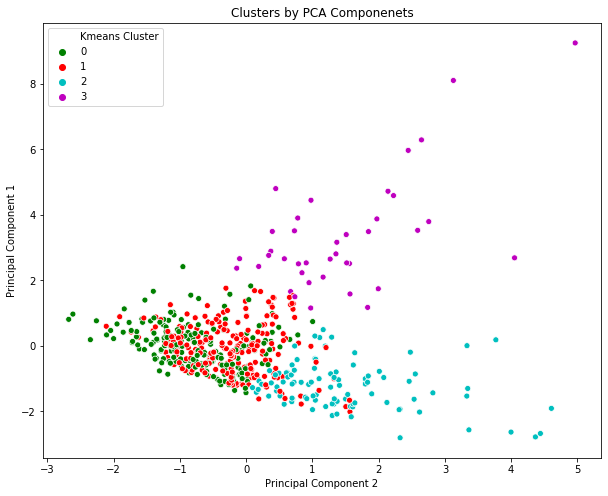

In [45]:
x_axis = dfnum_pca_kmeans['Principal Component 2']
y_axis = dfnum_pca_kmeans['Principal Component 1']
plt.figure(figsize =(10,8))
sns.scatterplot(x_axis, y_axis, hue = dfnum_pca_kmeans['Kmeans Cluster'], palette = ['g','r','c','m'])
plt.title('Clusters by PCA Componenets')
plt.show()

In [46]:
x = pd.DataFrame(final_pca_glm.components_,columns=df_glm.columns,index = ['PC-1','PC-2','PC-3','PC-4'])
x

,cases,deaths,grocery_and_pharmacy_percent_change_from_baseline,windSpdMin,parks_percent_change_from_baseline,spcHumMin
PC-1,0.586593,0.549133,0.175341,0.181018,0.397625,-0.364340
PC-2,0.357247,0.372250,-0.273456,0.263763,-0.584927,0.497308
PC-3,-0.112413,-0.139124,-0.735445,0.518761,0.091706,-0.386788
PC-4,-0.046507,-0.275907,0.449388,0.758018,0.202260,0.322895


In [47]:
df_clean.index

Int64Index([  0,   2,   3,   5,   6,   7,   8,   9,  10,  11,
            ...
            723, 724, 725, 726, 727, 728, 729, 731, 732, 734],
           dtype='int64', length=543)

In [48]:
df_clean_kmean = df.iloc[df_clean.index]
df_clean_kmean['Kmeans Cluster'] = kmeans_final_glm.labels_
df_clean_kmean['state_county'] = df_clean_kmean.county +', ' +df_clean_kmean.state
df_clean_kmean.head()

/Users/jzhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jzhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,state,county,fips,cases,deaths,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,...,workplaces_percent_change_from_baseline,transit_stations_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,income_2018,pop_2018,day_21_delta_cases,day_21_delta_deaths,Kmeans Cluster,state_county
0,alabama,baldwin,1003,34.266667,0.733333,0.000000,30.800000,89.066667,50.306667,56.046667,...,-34.333333,-28.666667,-14.400000,-36.133333,45596.0,218022.0,43,1,2,"baldwin, alabama"
2,alabama,elmore,1051,17.133333,0.000000,0.333333,33.933333,90.133333,47.853333,53.253333,...,-37.533333,NaN,0.133333,27.571429,42269.0,81887.0,25,0,0,"elmore, alabama"
3,alabama,jefferson,1073,94.000000,0.000000,3.866667,48.155556,92.511111,53.826667,59.091111,...,-32.533333,-28.133333,2.533333,13.133333,54730.0,659300.0,172,9,0,"jefferson, alabama"
5,alabama,lee,1081,44.666667,0.600000,0.000000,34.000000,88.133333,50.246667,55.433333,...,-36.733333,NaN,-7.933333,-14.000000,38036.0,163941.0,115,3,2,"lee, alabama"
6,alabama,limestone,1083,25.066667,0.000000,0.033333,37.566667,90.300000,46.213333,51.003333,...,-39.600000,NaN,-2.333333,14.076923,42546.0,96174.0,3,0,0,"limestone, alabama"


In [49]:
# counties with top 10 cases in cluster 0
df_clean_kmean[df_clean_kmean['Kmeans Cluster'] == 0].sort_values(by=['cases'],ascending=False).state_county[0:10]

194                 cook, illinois
406            st. louis, missouri
485          westchester, new york
55           san diego, california
503    mecklenburg, north carolina
200                 lake, illinois
89           hartford, connecticut
415                  clark, nevada
187                     ada, idaho
456             dutchess, new york
Name: state_county, dtype: object

In [50]:
df_clean_kmean[df_clean_kmean['Kmeans Cluster'] == 1].sort_values(by=['cases'],ascending=False).state_county[0:10]

583         lehigh, pennsylvania
316       bristol, massachusetts
325     worcester, massachusetts
580      lancaster, pennsylvania
523               franklin, ohio
347          washtenaw, michigan
466           onondaga, new york
575       delaware, pennsylvania
196             dupage, illinois
314    barnstable, massachusetts
Name: state_county, dtype: object

In [51]:
df_clean_kmean[df_clean_kmean['Kmeans Cluster'] == 2].sort_values(by=['cases'],ascending=False).state_county[0:10]

121           miami-dade, florida
635             shelby, tennessee
126           palm beach, florida
668                 travis, texas
103              broward, florida
124               orange, florida
113         hillsborough, florida
648                 dallas, texas
158               fulton, georgia
603    charleston, south carolina
Name: state_county, dtype: object

In [52]:
df_clean_kmean[df_clean_kmean['Kmeans Cluster'] == 3].sort_values(by=['cases'],ascending=False).state_county[0:10]

348               wayne, michigan
478             suffolk, new york
473            rockland, new york
468              orange, new york
463              nassau, new york
443             union, new jersey
438             ocean, new jersey
342             oakland, michigan
588    philadelphia, pennsylvania
339              macomb, michigan
Name: state_county, dtype: object